<a href="https://colab.research.google.com/github/Nick-Azzarano/Machine-Learning-Practice/blob/main/Spring2025/Homeworks/HW10_Azzarano_Nick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nick Azzarano
<br/>
CSCI 335
<br/>
Anton Selitskiy
<br/>
April 14, 2025

# Homework 10

In this homework, you will implement NN using PyTorch and investigate different activation functions, batch sizes, and learning rates. Use [Lecture code](https://github.com/anton-selitskiy/RIT_ML/blob/main/2025_spring/Week11_MLP/ML21.ipynb) as refference.

Use load_planar_dataset function from the previous homework to create the data.

In [310]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [311]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros(m, dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius. 4 corresponds to the number of petals
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

In [312]:
x, y = load_planar_dataset()  #make_moons(n_samples=200, noise=0.1)  make_circles(n_samples=200, noise=0.1)
y = y.reshape(-1,1)
x.shape, y.shape

((400, 2), (400, 1))

In [313]:
x[:,0]

array([ 1.20444229e+00,  1.58709904e-01,  9.52471960e-02,  3.49178475e-01,
        6.94150378e-01,  1.62065038e+00,  1.53856225e+00,  3.63085641e-02,
        4.74591109e-01,  1.65695828e-01,  1.66446249e+00,  8.40285720e-01,
        2.61695163e-01,  2.31614896e-01,  1.58013020e+00,  6.35509950e-03,
        6.80610419e-01,  1.21400432e-01,  1.13281261e+00,  1.61505892e+00,
        1.66454441e-01,  1.72438241e+00,  1.88667246e+00,  1.72327227e+00,
        1.54661332e+00,  9.84590400e-01,  1.45313345e+00,  7.49043388e-01,
        1.45048341e+00,  1.64287865e+00,  1.28141487e+00,  1.59574104e+00,
        1.46298294e+00,  1.46629048e+00,  1.54348961e+00,  1.57013416e+00,
        1.22995404e+00,  1.31142345e+00, -1.99364553e+00,  3.94564752e-01,
        1.51715449e+00,  1.69169139e+00,  1.74186686e+00, -2.91373382e+00,
        7.52150898e-01,  1.68537303e+00,  3.71160238e-01, -3.73033884e+00,
        3.52484080e-01, -1.48694206e+00, -7.45290416e-01,  5.63807442e-01,
        1.27093179e+00,  

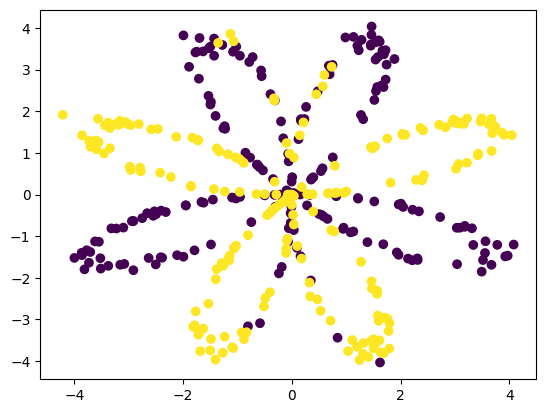

In [314]:
plt.scatter(x[:,0], x[:,1], c=y)

##1. (2 pt) Create Dataset object.

In [315]:
class MyData(Dataset):
    def __init__(self, x, y):
        """
        Initialize the dataset with features (x) and labels (y).
        """
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        """
        Return the number of samples in the dataset.
        """
        return len(self.x)

    def __getitem__(self, idx):
        """
        Retrieve a single sample (features and label) by index.
        """
        return self.x[idx], self.y[idx]

In [316]:
data = MyData(x,y)

In [317]:
data.__len__()

400

In [318]:
data.__getitem__(0)

(tensor([1.2044, 3.5761]), tensor([0.]))

## 2. (1 pt) Create DataLoader object.

In [319]:
data_loader = DataLoader(data, batch_size=32, shuffle=True)

In [320]:
for x_batch, y_batch in data_loader:
  print(x_batch.shape, y_batch.shape)

torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([16, 2]) torch.Size([16, 1])


## 3. (3 pt) Construct the model
$$
hidden\_1 \to activation\_1 \to hidden\_2 \to activation\_2  
$$
Use `Sigmoid` function as activation on this step.

In [321]:
import torch.nn as nn

In [322]:
# class MyModel(nn.Module):
#   # The constructor is what layers are within your model
#   def __init__(self, input_size, hidden_1_size, hidden_2_size):
#     super().__init__()
#     self.fc1 = nn.Linear(input_size, hidden_1_size) #fc stands for "fully connected", it fans out to hidden_size number of nodes
#     self.activation = nn.Sigmoid() # Activation function
#     self.fc2 = nn.Linear(hidden_1_size, hidden_2_size) # create a second hidden layer
#     self.output = nn.Linear(hidden_2_size, 1) # we map our hidden_size back down to 1.

#   #
#   def forward(self, x_batch):
#     o = self.fc1(x_batch)
#     o = self.activation(o)
#     o = self.fc2(o)
#     o = self.activation(o)
#     o = self.output(o)
#     return o

In [323]:
class MyModel(nn.Module):
    def __init__(self, input_size, hidden_1_size, hidden_2_size, activation_func_1, activation_func_2):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_1_size)
        self.activation_1 = activation_func_1
        self.fc2 = nn.Linear(hidden_1_size, hidden_2_size)
        self.activation_2 = activation_func_2
        self.output = nn.Linear(hidden_2_size, 1)
        self.output_activation = activation_func_2  # Add Sigmoid for the output layer

    def forward(self, x_batch):
        o = self.fc1(x_batch)
        o = self.activation_1(o)
        o = self.fc2(o)
        o = self.activation_2(o)
        o = self.output(o)
        o = self.output_activation(o)  # Apply Sigmoid here
        return o

In [324]:
input_size = 2
hidden_1_size = 4
hidden_2_size = 3
activation_func_1 = nn.Sigmoid()
activation_func_2 = nn.Sigmoid()
my_model = MyModel(input_size, hidden_1_size, hidden_2_size, activation_func_1, activation_func_2)

## 4. (3 pt) Write the training loop. Use Binary cross-entropy loss. Also, you can use tqdm function to see the training progress. You can start with learning rate 0.01.

In [325]:
from torch.nn import BCELoss
from tqdm import tqdm

In [326]:
# Initialize the loss function
loss_fn = BCELoss()

In [327]:
# Initialize the optimizer
from torch.optim import Adam
optimizer = Adam(my_model.parameters(), lr=0.01)

In [328]:
for batch in data_loader:
  x_batch, y_batch = batch
  print(x_batch.shape, y_batch.shape)

torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([32, 2]) torch.Size([32, 1])
torch.Size([16, 2]) torch.Size([16, 1])


In [343]:
# Initialize a list to store the loss for each epoch
loss_history = []

# Training loop
epochs = 100  # Number of epochs
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        x_batch, y_batch = batch

        # Forward pass
        predictions = my_model.forward(x_batch)
        loss = loss_fn(predictions, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        epoch_loss += loss.item()

    # Store the average loss for this epoch
    loss_history.append(epoch_loss / len(data_loader))
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1/100: 100%|██████████| 13/13 [00:00<00:00, 560.08it/s]


Epoch 1, Loss: 7.5101


Epoch 2/100: 100%|██████████| 13/13 [00:00<00:00, 522.06it/s]


Epoch 2, Loss: 7.4530


Epoch 3/100: 100%|██████████| 13/13 [00:00<00:00, 589.44it/s]


Epoch 3, Loss: 7.4719


Epoch 4/100: 100%|██████████| 13/13 [00:00<00:00, 559.20it/s]


Epoch 4, Loss: 7.4899


Epoch 5/100: 100%|██████████| 13/13 [00:00<00:00, 597.10it/s]


Epoch 5, Loss: 7.5403


Epoch 6/100: 100%|██████████| 13/13 [00:00<00:00, 563.52it/s]


Epoch 6, Loss: 7.5494


Epoch 7/100: 100%|██████████| 13/13 [00:00<00:00, 423.94it/s]


Epoch 7, Loss: 7.5509


Epoch 8/100: 100%|██████████| 13/13 [00:00<00:00, 332.91it/s]


Epoch 8, Loss: 7.5689


Epoch 9/100: 100%|██████████| 13/13 [00:00<00:00, 350.81it/s]


Epoch 9, Loss: 7.5910


Epoch 10/100: 100%|██████████| 13/13 [00:00<00:00, 357.97it/s]


Epoch 10, Loss: 7.5511


Epoch 11/100: 100%|██████████| 13/13 [00:00<00:00, 382.92it/s]


Epoch 11, Loss: 7.4943


Epoch 12/100: 100%|██████████| 13/13 [00:00<00:00, 391.77it/s]


Epoch 12, Loss: 7.5631


Epoch 13/100: 100%|██████████| 13/13 [00:00<00:00, 434.90it/s]


Epoch 13, Loss: 7.4677


Epoch 14/100: 100%|██████████| 13/13 [00:00<00:00, 423.03it/s]


Epoch 14, Loss: 7.5627


Epoch 15/100: 100%|██████████| 13/13 [00:00<00:00, 441.15it/s]


Epoch 15, Loss: 7.5019


Epoch 16/100: 100%|██████████| 13/13 [00:00<00:00, 355.51it/s]


Epoch 16, Loss: 7.5056


Epoch 17/100: 100%|██████████| 13/13 [00:00<00:00, 313.72it/s]


Epoch 17, Loss: 7.4970


Epoch 18/100: 100%|██████████| 13/13 [00:00<00:00, 414.47it/s]


Epoch 18, Loss: 7.5928


Epoch 19/100: 100%|██████████| 13/13 [00:00<00:00, 467.06it/s]


Epoch 19, Loss: 7.5297


Epoch 20/100: 100%|██████████| 13/13 [00:00<00:00, 364.30it/s]


Epoch 20, Loss: 7.5213


Epoch 21/100: 100%|██████████| 13/13 [00:00<00:00, 456.19it/s]


Epoch 21, Loss: 7.4389


Epoch 22/100: 100%|██████████| 13/13 [00:00<00:00, 458.19it/s]


Epoch 22, Loss: 7.4832


Epoch 23/100: 100%|██████████| 13/13 [00:00<00:00, 351.85it/s]


Epoch 23, Loss: 7.4627


Epoch 24/100: 100%|██████████| 13/13 [00:00<00:00, 433.80it/s]


Epoch 24, Loss: 7.4885


Epoch 25/100: 100%|██████████| 13/13 [00:00<00:00, 386.06it/s]


Epoch 25, Loss: 7.5460


Epoch 26/100: 100%|██████████| 13/13 [00:00<00:00, 382.51it/s]


Epoch 26, Loss: 7.4813


Epoch 27/100: 100%|██████████| 13/13 [00:00<00:00, 460.78it/s]


Epoch 27, Loss: 7.5285


Epoch 28/100: 100%|██████████| 13/13 [00:00<00:00, 415.42it/s]


Epoch 28, Loss: 7.5326


Epoch 29/100: 100%|██████████| 13/13 [00:00<00:00, 426.59it/s]


Epoch 29, Loss: 7.5220


Epoch 30/100: 100%|██████████| 13/13 [00:00<00:00, 399.98it/s]


Epoch 30, Loss: 7.4724


Epoch 31/100: 100%|██████████| 13/13 [00:00<00:00, 416.46it/s]


Epoch 31, Loss: 7.5257


Epoch 32/100: 100%|██████████| 13/13 [00:00<00:00, 451.24it/s]


Epoch 32, Loss: 7.5370


Epoch 33/100: 100%|██████████| 13/13 [00:00<00:00, 396.99it/s]


Epoch 33, Loss: 7.4477


Epoch 34/100: 100%|██████████| 13/13 [00:00<00:00, 459.03it/s]


Epoch 34, Loss: 7.5333


Epoch 35/100: 100%|██████████| 13/13 [00:00<00:00, 359.41it/s]


Epoch 35, Loss: 7.5912


Epoch 36/100: 100%|██████████| 13/13 [00:00<00:00, 390.27it/s]


Epoch 36, Loss: 7.4830


Epoch 37/100: 100%|██████████| 13/13 [00:00<00:00, 378.23it/s]


Epoch 37, Loss: 7.4214


Epoch 38/100: 100%|██████████| 13/13 [00:00<00:00, 431.56it/s]


Epoch 38, Loss: 7.5108


Epoch 39/100: 100%|██████████| 13/13 [00:00<00:00, 437.66it/s]


Epoch 39, Loss: 7.4857


Epoch 40/100: 100%|██████████| 13/13 [00:00<00:00, 405.21it/s]


Epoch 40, Loss: 7.5650


Epoch 41/100: 100%|██████████| 13/13 [00:00<00:00, 407.31it/s]


Epoch 41, Loss: 7.3978


Epoch 42/100: 100%|██████████| 13/13 [00:00<00:00, 400.25it/s]


Epoch 42, Loss: 7.4500


Epoch 43/100: 100%|██████████| 13/13 [00:00<00:00, 435.71it/s]


Epoch 43, Loss: 7.5723


Epoch 44/100: 100%|██████████| 13/13 [00:00<00:00, 405.51it/s]


Epoch 44, Loss: 7.5046


Epoch 45/100: 100%|██████████| 13/13 [00:00<00:00, 349.10it/s]


Epoch 45, Loss: 7.4347


Epoch 46/100: 100%|██████████| 13/13 [00:00<00:00, 345.97it/s]


Epoch 46, Loss: 7.4724


Epoch 47/100: 100%|██████████| 13/13 [00:00<00:00, 394.65it/s]


Epoch 47, Loss: 7.4179


Epoch 48/100: 100%|██████████| 13/13 [00:00<00:00, 472.54it/s]


Epoch 48, Loss: 7.4933


Epoch 49/100: 100%|██████████| 13/13 [00:00<00:00, 443.40it/s]


Epoch 49, Loss: 7.4385


Epoch 50/100: 100%|██████████| 13/13 [00:00<00:00, 330.47it/s]


Epoch 50, Loss: 7.5186


Epoch 51/100: 100%|██████████| 13/13 [00:00<00:00, 301.50it/s]


Epoch 51, Loss: 7.4605


Epoch 52/100: 100%|██████████| 13/13 [00:00<00:00, 326.04it/s]


Epoch 52, Loss: 7.5831


Epoch 53/100: 100%|██████████| 13/13 [00:00<00:00, 412.77it/s]


Epoch 53, Loss: 7.5907


Epoch 54/100: 100%|██████████| 13/13 [00:00<00:00, 422.92it/s]


Epoch 54, Loss: 7.5250


Epoch 55/100: 100%|██████████| 13/13 [00:00<00:00, 401.71it/s]


Epoch 55, Loss: 7.4511


Epoch 56/100: 100%|██████████| 13/13 [00:00<00:00, 403.47it/s]


Epoch 56, Loss: 7.4880


Epoch 57/100: 100%|██████████| 13/13 [00:00<00:00, 404.38it/s]


Epoch 57, Loss: 7.5006


Epoch 58/100: 100%|██████████| 13/13 [00:00<00:00, 381.38it/s]


Epoch 58, Loss: 7.4329


Epoch 59/100: 100%|██████████| 13/13 [00:00<00:00, 399.92it/s]


Epoch 59, Loss: 7.4760


Epoch 60/100: 100%|██████████| 13/13 [00:00<00:00, 440.10it/s]


Epoch 60, Loss: 7.3854


Epoch 61/100: 100%|██████████| 13/13 [00:00<00:00, 391.58it/s]


Epoch 61, Loss: 7.5285


Epoch 62/100: 100%|██████████| 13/13 [00:00<00:00, 405.96it/s]


Epoch 62, Loss: 7.5032


Epoch 63/100: 100%|██████████| 13/13 [00:00<00:00, 400.47it/s]


Epoch 63, Loss: 7.4944


Epoch 64/100: 100%|██████████| 13/13 [00:00<00:00, 373.33it/s]


Epoch 64, Loss: 7.4320


Epoch 65/100: 100%|██████████| 13/13 [00:00<00:00, 286.85it/s]


Epoch 65, Loss: 7.5218


Epoch 66/100: 100%|██████████| 13/13 [00:00<00:00, 453.29it/s]


Epoch 66, Loss: 7.4626


Epoch 67/100: 100%|██████████| 13/13 [00:00<00:00, 332.85it/s]


Epoch 67, Loss: 7.4975


Epoch 68/100: 100%|██████████| 13/13 [00:00<00:00, 387.09it/s]


Epoch 68, Loss: 7.4254


Epoch 69/100: 100%|██████████| 13/13 [00:00<00:00, 409.89it/s]


Epoch 69, Loss: 7.5825


Epoch 70/100: 100%|██████████| 13/13 [00:00<00:00, 431.47it/s]


Epoch 70, Loss: 7.3932


Epoch 71/100: 100%|██████████| 13/13 [00:00<00:00, 416.81it/s]


Epoch 71, Loss: 7.5257


Epoch 72/100: 100%|██████████| 13/13 [00:00<00:00, 369.58it/s]


Epoch 72, Loss: 7.5660


Epoch 73/100: 100%|██████████| 13/13 [00:00<00:00, 404.98it/s]


Epoch 73, Loss: 7.4139


Epoch 74/100: 100%|██████████| 13/13 [00:00<00:00, 327.07it/s]


Epoch 74, Loss: 7.4085


Epoch 75/100: 100%|██████████| 13/13 [00:00<00:00, 298.30it/s]


Epoch 75, Loss: 7.4367


Epoch 76/100: 100%|██████████| 13/13 [00:00<00:00, 380.33it/s]


Epoch 76, Loss: 7.4726


Epoch 77/100: 100%|██████████| 13/13 [00:00<00:00, 357.92it/s]


Epoch 77, Loss: 7.4472


Epoch 78/100: 100%|██████████| 13/13 [00:00<00:00, 278.69it/s]


Epoch 78, Loss: 7.3900


Epoch 79/100: 100%|██████████| 13/13 [00:00<00:00, 396.01it/s]


Epoch 79, Loss: 7.4261


Epoch 80/100: 100%|██████████| 13/13 [00:00<00:00, 391.41it/s]


Epoch 80, Loss: 7.5078


Epoch 81/100: 100%|██████████| 13/13 [00:00<00:00, 416.35it/s]


Epoch 81, Loss: 7.4662


Epoch 82/100: 100%|██████████| 13/13 [00:00<00:00, 318.20it/s]


Epoch 82, Loss: 7.4024


Epoch 83/100: 100%|██████████| 13/13 [00:00<00:00, 380.35it/s]


Epoch 83, Loss: 7.4741


Epoch 84/100: 100%|██████████| 13/13 [00:00<00:00, 386.48it/s]


Epoch 84, Loss: 7.4778


Epoch 85/100: 100%|██████████| 13/13 [00:00<00:00, 353.61it/s]


Epoch 85, Loss: 7.4825


Epoch 86/100: 100%|██████████| 13/13 [00:00<00:00, 398.86it/s]


Epoch 86, Loss: 7.4668


Epoch 87/100: 100%|██████████| 13/13 [00:00<00:00, 367.04it/s]


Epoch 87, Loss: 7.4231


Epoch 88/100: 100%|██████████| 13/13 [00:00<00:00, 286.72it/s]


Epoch 88, Loss: 7.4380


Epoch 89/100: 100%|██████████| 13/13 [00:00<00:00, 342.73it/s]


Epoch 89, Loss: 7.3971


Epoch 90/100: 100%|██████████| 13/13 [00:00<00:00, 385.37it/s]


Epoch 90, Loss: 7.5304


Epoch 91/100: 100%|██████████| 13/13 [00:00<00:00, 332.82it/s]


Epoch 91, Loss: 7.4436


Epoch 92/100: 100%|██████████| 13/13 [00:00<00:00, 419.40it/s]


Epoch 92, Loss: 7.4879


Epoch 93/100: 100%|██████████| 13/13 [00:00<00:00, 413.59it/s]


Epoch 93, Loss: 7.5468


Epoch 94/100: 100%|██████████| 13/13 [00:00<00:00, 532.37it/s]


Epoch 94, Loss: 7.4526


Epoch 95/100: 100%|██████████| 13/13 [00:00<00:00, 524.72it/s]


Epoch 95, Loss: 7.4461


Epoch 96/100: 100%|██████████| 13/13 [00:00<00:00, 526.84it/s]


Epoch 96, Loss: 7.5329


Epoch 97/100: 100%|██████████| 13/13 [00:00<00:00, 513.85it/s]


Epoch 97, Loss: 7.4411


Epoch 98/100: 100%|██████████| 13/13 [00:00<00:00, 519.58it/s]


Epoch 98, Loss: 7.4300


Epoch 99/100: 100%|██████████| 13/13 [00:00<00:00, 517.42it/s]


Epoch 99, Loss: 7.3633


Epoch 100/100: 100%|██████████| 13/13 [00:00<00:00, 507.07it/s]

Epoch 100, Loss: 7.3872


## 5. (2 pt) Write the prediction class to use it in plot_decision_regions function.

In [344]:
class MyPrediction:
    def __init__(self, model):
        """
        Initialize the Prediction class with the trained model.
        """
        self.model = model

    def predict(self, x):
        """
        Predict the class labels for the input data.
        Args:
            x (torch.Tensor or np.ndarray): Input data of shape (n_samples, n_features).
        Returns:
            np.ndarray: Predicted class labels (0 or 1) of shape (n_samples,).
        """
        if isinstance(x, np.ndarray):
            x = torch.tensor(x, dtype=torch.float32)  # Convert to torch.Tensor if input is a NumPy array

        with torch.no_grad():  # Disable gradient computation for inference
            probabilities = self.model(x)  # Get probabilities from the model
            predictions = (probabilities >= 0.5).float()  # Convert probabilities to binary labels (0 or 1)

        return predictions.numpy().flatten()  # Convert to NumPy array and flatten to 1D

In [345]:
# Initialize the Prediction class with the trained model
my_predictor = MyPrediction(my_model)

## 6. (2 pt) Plot the loss and decision boundary after the training.

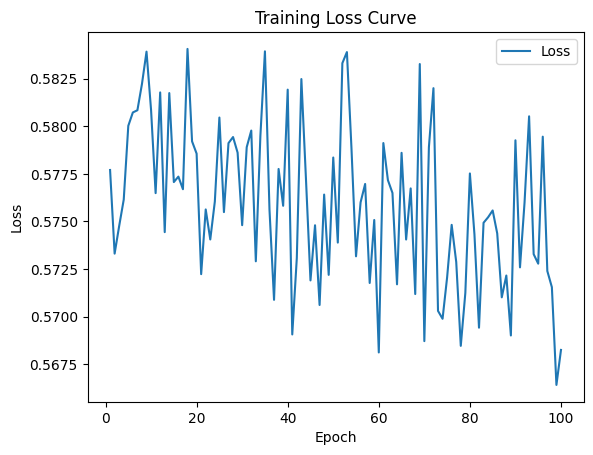

In [346]:
# Plot the loss curve
plt.plot(range(1, epochs + 1), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

In [347]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

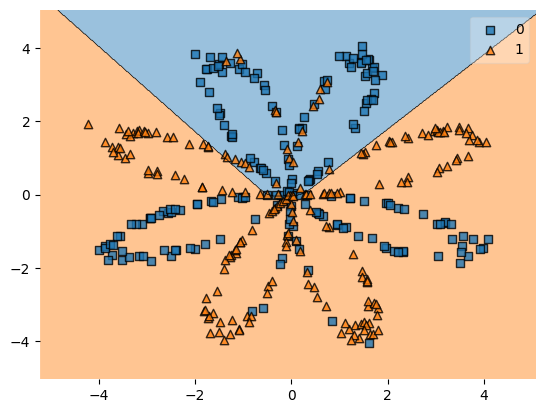

In [348]:
plot_decision_regions(x,y.reshape(-1,),my_predictor)

## 7. Experiments 1: Try LeakyReLU as `activation_1` with the size of `hidden_1` = 4, 5, and 10. You can reuse the same model without copying it.

In [ ]:
activation_func = nn.LeakyReLU()
input_size = 2
hidden_1_size = 4
hidden_2_size = 3
my_model_leakyReLU = MyModel(input_size, hidden_1_size, hidden_2_size, activation_func)

## 8. (3 pt) Comment on the number of the straight lines with respect to the size of the hidden layer.

## 9. Experiments 2: with the `hidden_1` layer of the size 4 try Sigmoind, ReLU, LeakyReLU, ELU, and SiLU as `activation_1`. Do this for batch sizes 4 and 50.

## 10. (4 pt) Comment on the shape of the decision boundaries with respect to the activation function and the batch size. Did you adjust the learning rate? Did you try to start with small learning rate like 0.001 instead of 0.01 and if so, which worked better?